In [8]:
import pandas as pd
import numpy as np

###API Setup 

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os

In [4]:
def setup(api):
  import shutil
  ss = api.split()
  folder = ss[-1]
  x,y = folder.split('/')
  os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle/"+y
  %cd /content/gdrive/My Drive/Kaggle/
  !mkdir $y
  shutil.copy2("kaggle.json","./"+y+"/kaggle.json")
  %cd $y
  folder = x+'/'+y
  !kaggle datasets download -d $folder 

In [5]:
setup("kaggle datasets download -d dwdkills/weather")
!ls

/content/gdrive/My Drive/Kaggle
/content/gdrive/My Drive/Kaggle/weather
  0% 0.00/24.7k [00:00<?, ?B/s]
100% 24.7k/24.7k [00:00<00:00, 3.40MB/s]
kaggle.json  weather.zip


____________________________________________________________________________________

In [6]:
!unzip weather.zip

Archive:  weather.zip
  inflating: weather.csv             


In [82]:
df = pd.read_csv("weather.csv")

In [83]:
for col in df.columns:
  ls = df[col]
  for i in range(len(ls)):
    z = ls[i].split(',')
    if len(z)==2:
      num = float(z[0])+0.1*float(z[1])
    ls[i] = num
  df[col] = ls

In [84]:
df = df.astype('float')

In [85]:
x = df.drop(["water_level"],axis = 1)
y = df["water_level"]

In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [87]:
x_train.shape

(1007, 11)

**It is important to split data beforehand because data leak will occur if we do it on complete dataset**

###Correlation Findings

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt


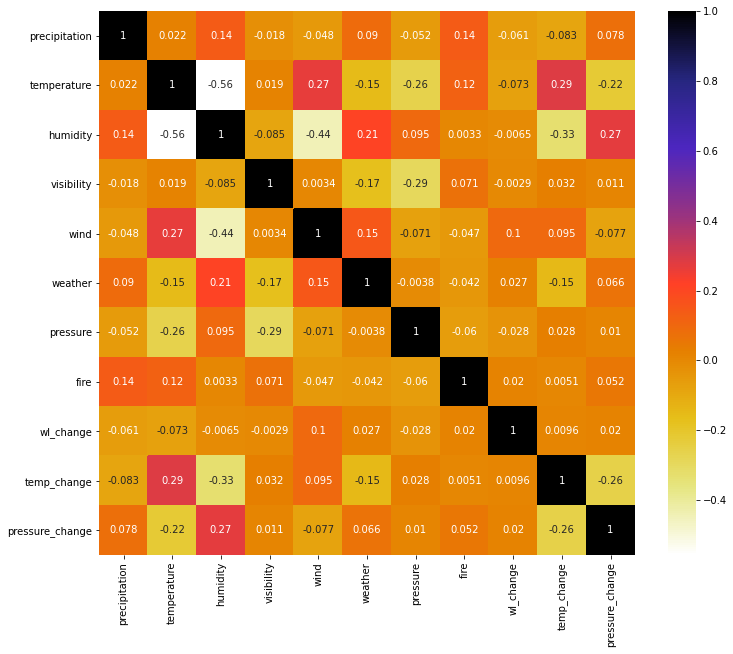

In [89]:
plt.figure(figsize = (12,10))
cor = x_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [105]:
def correlation(df,threshold):
  cols = set()
  corr_matrix = df.corr()
  for i in range(len(corr_matrix.index)):
    for j in range(i+1,len(corr_matrix.columns)):
      if corr_matrix.iloc[i,j]>threshold:
        colname = corr_matrix.index[i]
        cols.add(colname)
  return cols,corr_matrix

In [110]:
cols,matrix = correlation(x_train,0.26)

In [112]:
x_train.drop(cols,axis = 1)
x_test.drop(cols,axis = 1)

,precipitation,visibility,wind,weather,pressure,fire,wl_change,temp_change,pressure_change
311,0.0,100.0,4.0,1.0,995.2,5.0,-4.0,5.8,0.4
522,0.0,100.0,2.0,0.0,1019.7,4.0,-3.0,-0.9,1.0
736,0.0,100.0,4.0,0.0,989.2,4.0,-81.0,3.6,-1.5
1116,0.1,20.0,3.0,0.0,991.7,4.0,-3.0,1.1,0.4
644,0.0,10.0,5.0,1.0,1001.4,4.0,-4.0,0.1,-1.9
...,...,...,...,...,...,...,...,...,...
483,0.1,20.0,2.0,0.0,1007.8,4.0,-1.0,-0.5,0.8
450,0.0,20.0,1.0,5.0,994.6,5.0,-1.0,-1.0,0.3
1056,0.0,100.0,2.0,0.0,964.8,4.0,-1.0,7.4,-0.3
789,0.0,20.0,2.0,2.0,1006.2,4.0,-15.0,-1.7,1.1
